In [1]:
import numpy as np
import pandas as pd
from kmodes.kprototypes import KPrototypes
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading Dataset
blood = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/blood-transfusion/transfusion.data', sep=",",engine = 'python')

In [3]:
blood.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [4]:
blood.info

<bound method DataFrame.info of      Recency (months)  Frequency (times)  Monetary (c.c. blood)  \
0                   2                 50                  12500   
1                   0                 13                   3250   
2                   1                 16                   4000   
3                   2                 20                   5000   
4                   1                 24                   6000   
..                ...                ...                    ...   
743                23                  2                    500   
744                21                  2                    500   
745                23                  3                    750   
746                39                  1                    250   
747                72                  1                    250   

     Time (months)  whether he/she donated blood in March 2007  
0               98                                           1  
1               28               

In [5]:
blood.shape

(748, 5)

In [6]:
blood.isnull().sum()

Recency (months)                              0
Frequency (times)                             0
Monetary (c.c. blood)                         0
Time (months)                                 0
whether he/she donated blood in March 2007    0
dtype: int64

In [7]:
blood.fillna(blood.mean(), inplace=True)

In [8]:
blood.columns

Index(['Recency (months)', 'Frequency (times)', 'Monetary (c.c. blood)',
       'Time (months)', 'whether he/she donated blood in March 2007'],
      dtype='object')

In [9]:
X = blood.drop(columns=['whether he/she donated blood in March 2007']).copy()


In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(X)

In [12]:
from sklearn.cluster import KMeans

In [13]:
kmeans=KMeans(n_clusters=3, random_state=42)
clusters=kmeans.fit_predict(x_scaled)

In [14]:
blood['Cluster'] = clusters

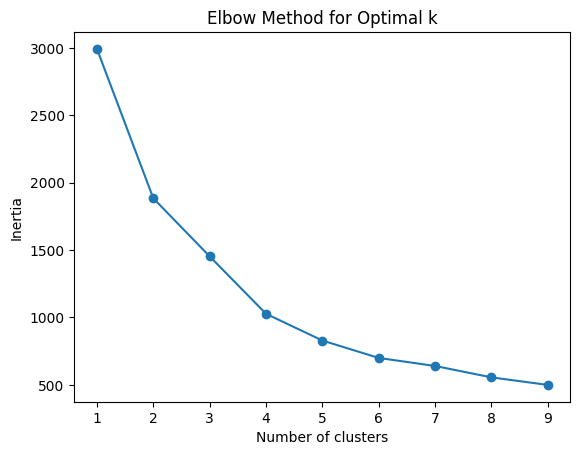

In [15]:
import matplotlib.pyplot as plt

inertia = []
for k in range(1, 10):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(x_scaled)
    inertia.append(km.inertia_)

plt.plot(range(1, 10), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()


In [16]:
print(blood['Cluster'].value_counts())


Cluster
1    513
0    226
2      9
Name: count, dtype: int64


In [17]:
cluster_summary = blood.groupby('Cluster').mean()
print(cluster_summary)


         Recency (months)  Frequency (times)  Monetary (c.c. blood)  \
Cluster                                                               
0                7.964602          10.123894            2530.973451   
1               10.270955           2.888889             722.222222   
2                4.666667          39.444444            9861.111111   

         Time (months)  whether he/she donated blood in March 2007  
Cluster                                                             
0            59.676991                                    0.278761  
1            22.083821                                    0.210526  
2            91.888889                                    0.777778  


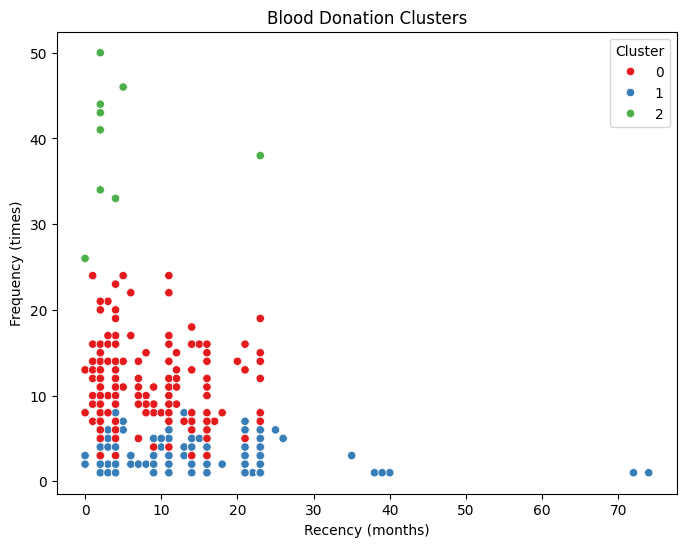

In [18]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=blood['Recency (months)'], y=blood['Frequency (times)'], hue=blood['Cluster'], palette='Set1')
plt.title('Blood Donation Clusters')
plt.xlabel('Recency (months)')
plt.ylabel('Frequency (times)')
plt.show()


In [19]:
target = blood['whether he/she donated blood in March 2007']
blood['Target'] = target


In [20]:
cluster_analysis = blood.groupby('Cluster').agg({
    'Recency (months)': 'mean',
    'Frequency (times)': 'mean',
    'Monetary (c.c. blood)': 'mean',
    'Time (months)': 'mean',
    'Target': ['mean', 'count']
})

cluster_analysis.columns = ['Recency_mean', 'Frequency_mean', 'Monetary_mean', 'Time_mean', 'Donation_rate', 'Count']
print(cluster_analysis)


         Recency_mean  Frequency_mean  Monetary_mean  Time_mean  \
Cluster                                                           
0            7.964602       10.123894    2530.973451  59.676991   
1           10.270955        2.888889     722.222222  22.083821   
2            4.666667       39.444444    9861.111111  91.888889   

         Donation_rate  Count  
Cluster                        
0             0.278761    226  
1             0.210526    513  
2             0.777778      9  


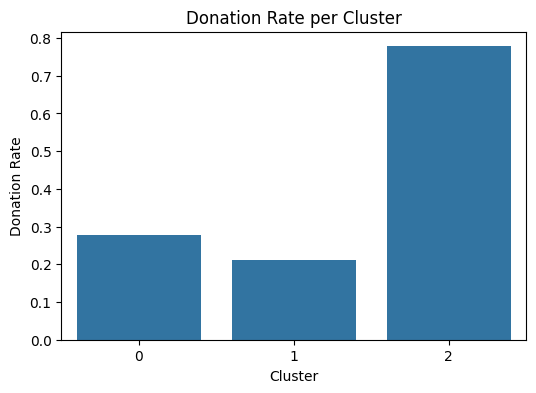

In [21]:
plt.figure(figsize=(6,4))
sns.barplot(x=cluster_analysis.index, y=cluster_analysis['Donation_rate'])
plt.ylabel('Donation Rate')
plt.title('Donation Rate per Cluster')
plt.show()

### pairplot 


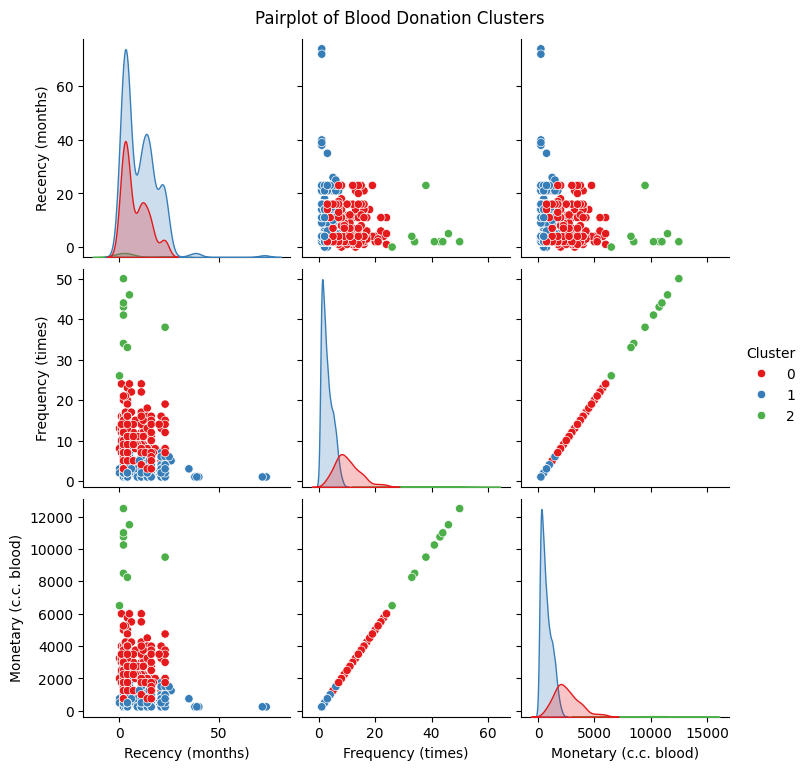

In [22]:
blood['Cluster'] = clusters

sns.pairplot(blood, vars=['Recency (months)', 'Frequency (times)', 'Monetary (c.c. blood)'], hue='Cluster', palette='Set1')
plt.suptitle("Pairplot of Blood Donation Clusters", y=1.02)
plt.show()

### 3D Scatter Plot

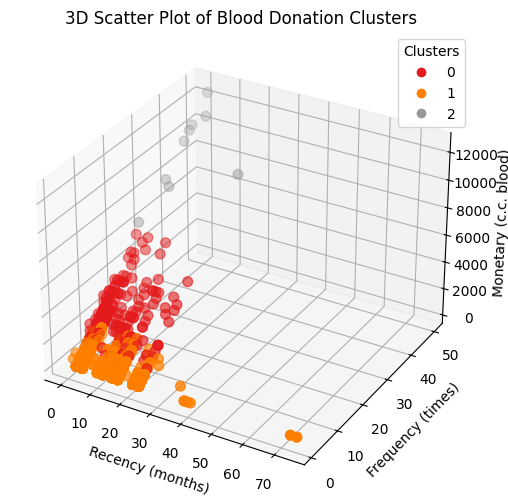

In [23]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

x = blood['Recency (months)']
y = blood['Frequency (times)']
z = blood['Monetary (c.c. blood)']
c = blood['Cluster']

scatter = ax.scatter(x, y, z, c=c, cmap='Set1', s=50)
ax.set_xlabel('Recency (months)')
ax.set_ylabel('Frequency (times)')
ax.set_zlabel('Monetary (c.c. blood)')
ax.set_title('3D Scatter Plot of Blood Donation Clusters')
plt.legend(*scatter.legend_elements(), title="Clusters")
plt.show()


### Heatmap

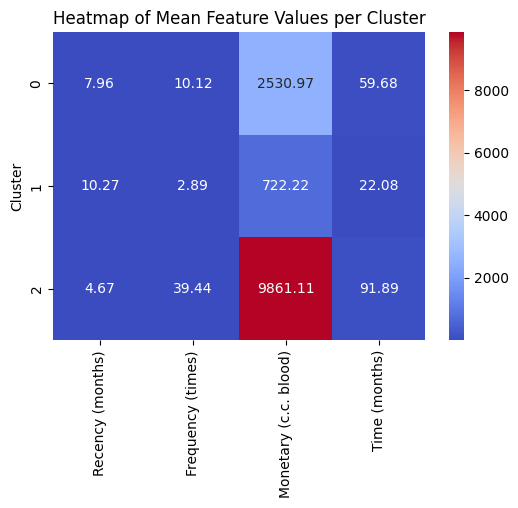

In [24]:
cluster_means = blood.groupby('Cluster')[['Recency (months)', 'Frequency (times)', 'Monetary (c.c. blood)', 'Time (months)']].mean()

plt.figure(figsize=(6,4))
sns.heatmap(cluster_means, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Mean Feature Values per Cluster')
plt.show()


### Identifying high-risk clusters for donor churn

In [25]:
blood['High_Risk'] = np.where((blood['Recency (months)'] > blood['Recency (months)'].mean()) &
                           (blood['Frequency (times)'] < blood['Frequency (times)'].mean()), 1, 0)

high_risk_summary = blood.groupby('Cluster')['High_Risk'].sum()
high_risk_summary


Cluster
0     17
1    236
2      0
Name: High_Risk, dtype: int64

In [26]:
# Add First Donation Month
blood['FirstDonationMonth'] = blood['Time (months)'] - blood['Recency (months)']

# Rename target column for clarity
blood['Donation'] = blood['whether he/she donated blood in March 2007']

### Cohort Grouping

In [28]:
# Group donors by first donation month (Cohort)
blood['Cohort'] = (blood['FirstDonationMonth'] // 12) * 12  # each cohort = 1 year

blood.head()


,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007,Cluster,Target,High_Risk,FirstDonationMonth,Donation,Cohort
0,2,50,12500,98,1,2,1,0,96,1,96
1,0,13,3250,28,1,0,1,0,28,1,24
2,1,16,4000,35,1,0,1,0,34,1,24
3,2,20,5000,45,1,0,1,0,43,1,36
4,1,24,6000,77,0,0,0,0,76,0,72


### Calculate Retention Rate per Cohort

In [29]:
# Retention Rate = percentage of donors who donated again
cohort_retention = blood.groupby('Cohort')['Donation'].mean().reset_index()
cohort_retention.columns = ['Cohort_Start_Month', 'Retention_Rate']

cohort_retention


,Cohort_Start_Month,Retention_Rate
0,0,0.189964
1,12,0.242647
2,24,0.330435
3,36,0.329114
4,48,0.122449
5,60,0.217391
6,72,0.206897
7,84,0.363636
8,96,0.500000


/tmp/ipykernel_43809/2059512761.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Cohort_Start_Month', y='Retention_Rate', data=cohort_retention, palette='Set2')


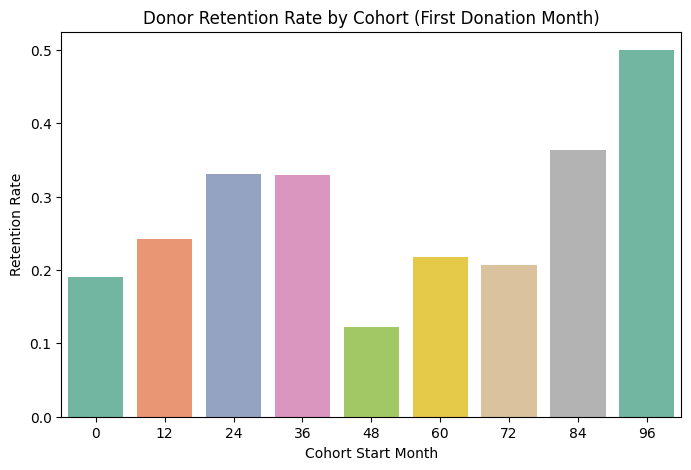

In [30]:
plt.figure(figsize=(8,5))
sns.barplot(x='Cohort_Start_Month', y='Retention_Rate', data=cohort_retention, palette='Set2')
plt.title('Donor Retention Rate by Cohort (First Donation Month)')
plt.xlabel('Cohort Start Month')
plt.ylabel('Retention Rate')
plt.show()


### Plot Retention Trends

In [32]:
# Total donors in each cohort
cohort_size = blood.groupby('Cohort')['Donation'].count()

# Number of donors who donated again
donated_again = blood.groupby('Cohort')['Donation'].sum()

# Retention rate per cohort
cohort_retention = (donated_again / cohort_size).reset_index()
cohort_retention.columns = ['Cohort_Start_Month', 'Retention_Rate']

# Cumulative retention (for visualization of trends)
cohort_retention['Cumulative_Retention'] = cohort_retention['Retention_Rate'].cumsum()

cohort_retention


,Cohort_Start_Month,Retention_Rate,Cumulative_Retention
0,0,0.189964,0.189964
1,12,0.242647,0.432611
2,24,0.330435,0.763046
3,36,0.329114,1.092160
4,48,0.122449,1.214609
5,60,0.217391,1.432000
6,72,0.206897,1.638897
7,84,0.363636,2.002533
8,96,0.500000,2.502533


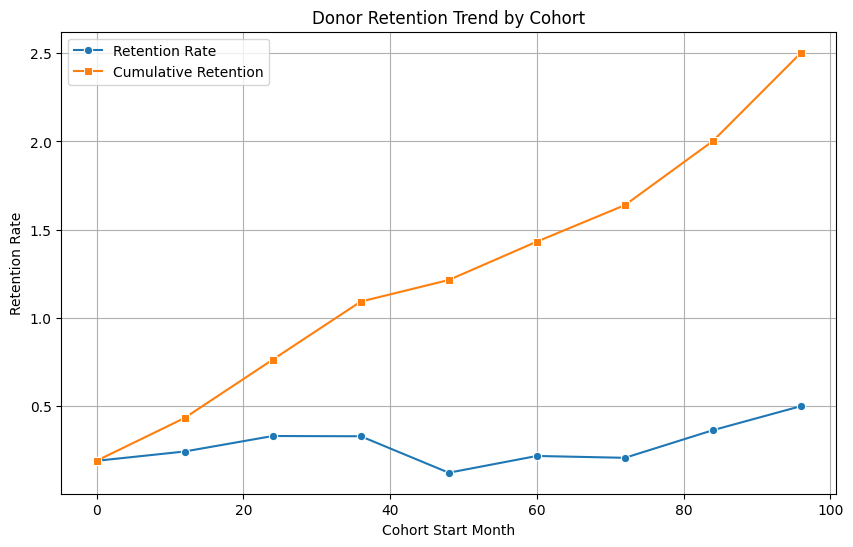

In [33]:
plt.figure(figsize=(10,6))
sns.lineplot(x='Cohort_Start_Month', y='Retention_Rate', data=cohort_retention, marker='o', label='Retention Rate')
sns.lineplot(x='Cohort_Start_Month', y='Cumulative_Retention', data=cohort_retention, marker='s', label='Cumulative Retention')
plt.title('Donor Retention Trend by Cohort')
plt.xlabel('Cohort Start Month')
plt.ylabel('Retention Rate')
plt.legend()
plt.grid(True)
plt.show()
